In [71]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# from keras.layers import LSTM, Dense, Dropout, InputLayer, Reshape
# from keras. models import Sequential
# from keras.callbacks import EarlyStopping

# from sklearn.model_selection import train_test_split

# RANDOM_STATE = 42

# landmark = "lunge_landmark_list.csv"

In [72]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model, Sequential
from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Convert labels to integers for sparse_categorical_crossentropy
from sklearn.preprocessing import LabelEncoder

In [73]:
# Load pre-trained model
pretrained_model_path = 'proto_model_test.h5'
pretrained_model = load_model(pretrained_model_path)

In [74]:
# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained layers
model = Sequential()
for layer in pretrained_model.layers:
    model.add(layer)

# Add new dense layers for fine-tuning
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="softmax"))

In [75]:
# Compile the model
model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 32)             │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,218 (20.38 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,218 (20.38 KB)

In [76]:
# Load your new data
RANDOM_STATE = 42
landmark = "lunge_landmark_list.csv"

val_data = pd.read_csv("lunge_landmark.csv", header=None)
predict_val = val_data.iloc[:, 1:-1].values
predict_val = np.array(predict_val)

lunge_data = pd.read_csv(landmark, header=None)
X = lunge_data.iloc[:, 1:-1].values
y = lunge_data.iloc[:, -1].values
X, y = np.array(X), np.array(y)

In [77]:
# Reshape data for LSTM (assuming 1 timestep for each sample)
X = X.reshape((X.shape[0], 1, X.shape[1]))
predict_val = predict_val.reshape((predict_val.shape[0], 1, predict_val.shape[1]))

# Reshape target data
y = y.reshape(-1, 1)

# Convert target data to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

# Define early stopping callback
es_callback = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=25)

In [78]:
# Train the model (fine-tuning)
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[es_callback])


Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6088 - loss: 0.6462 - val_accuracy: 0.8989 - val_loss: 0.5394
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8159 - loss: 0.5266 - val_accuracy: 0.8963 - val_loss: 0.4130
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8962 - loss: 0.4096 - val_accuracy: 0.8963 - val_loss: 0.3315
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8790 - loss: 0.3670 - val_accuracy: 0.8963 - val_loss: 0.2872
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8865 - loss: 0.3432 - val_accuracy: 0.8989 - val_loss: 0.2661
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8868 - loss: 0.3171 - val_accuracy: 0.8989 - val_loss: 0.2523
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8986 - loss: 0.3010 - val_accuracy: 0.8963 - val_loss: 0.2451
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8949 - loss: 0.3048 - val_accuracy: 0.8963 - 

In [79]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9006 - loss: 0.2014 


In [80]:
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9116 - loss: 0.1847


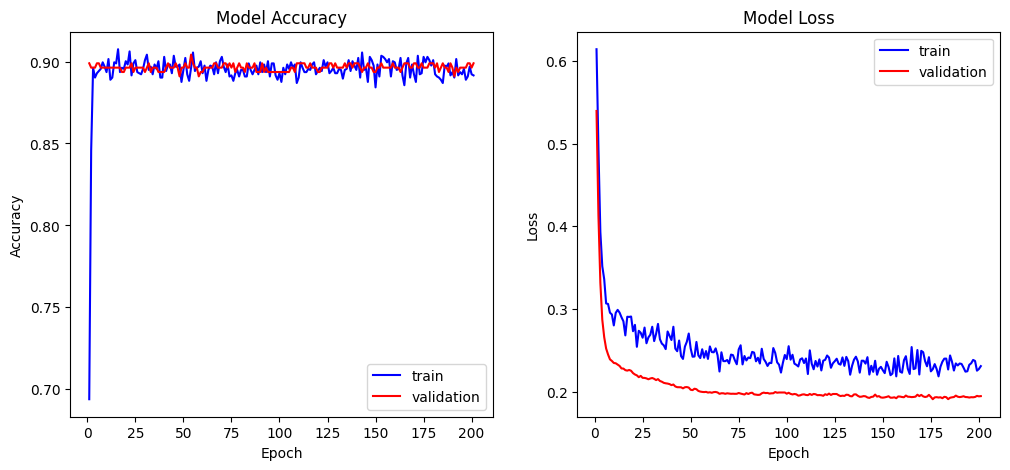

In [81]:
# Plot history
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]

    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="train")
    plt.plot(x, val_accuracy, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="train")
    plt.plot(x, val_loss, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")

plot_history(history)

In [82]:
# Make a prediction
res = model.predict(np.array([predict_val[0]]))
print(np.squeeze(res))
print(np.argmax(np.squeeze(res)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
[0.9943452  0.00565487]
0


In [83]:

# Save the fine-tuned model
model.save('fine_tuned_model.h5')